In [5]:
suppressMessages(here::i_am('R_analysis/notebooks/SI_aggregation.ipynb'))
CODE = here::here()
source(glue::glue("{CODE}/R_analysis/init.R"))

In [21]:
# Load functions
local_load('figures/out_of_sample.R')
# Load arguments
local_load('analysis/main_analysis_args.R')

In [22]:
oos = generate_out_of_sample_plot_df(
    year_min, year_max,
    growing_season_min, growing_season_max,
    GDD_lower, KDD_lower_list,
    temp_lower, temp_upper,
    sources = c("prism_resample", "era5_sine", "prism", "era5"),
    crops= c("corn"),
    transform=c('piecewise')
)

In [23]:
oos |> write_feather(glue("{CODE}/results/intermediate/out_of_sample_rms_aggregation.feather"))

In [30]:
oos = read_feather(glue("{CODE}/results/intermediate/out_of_sample_rms_aggregation.feather"))

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


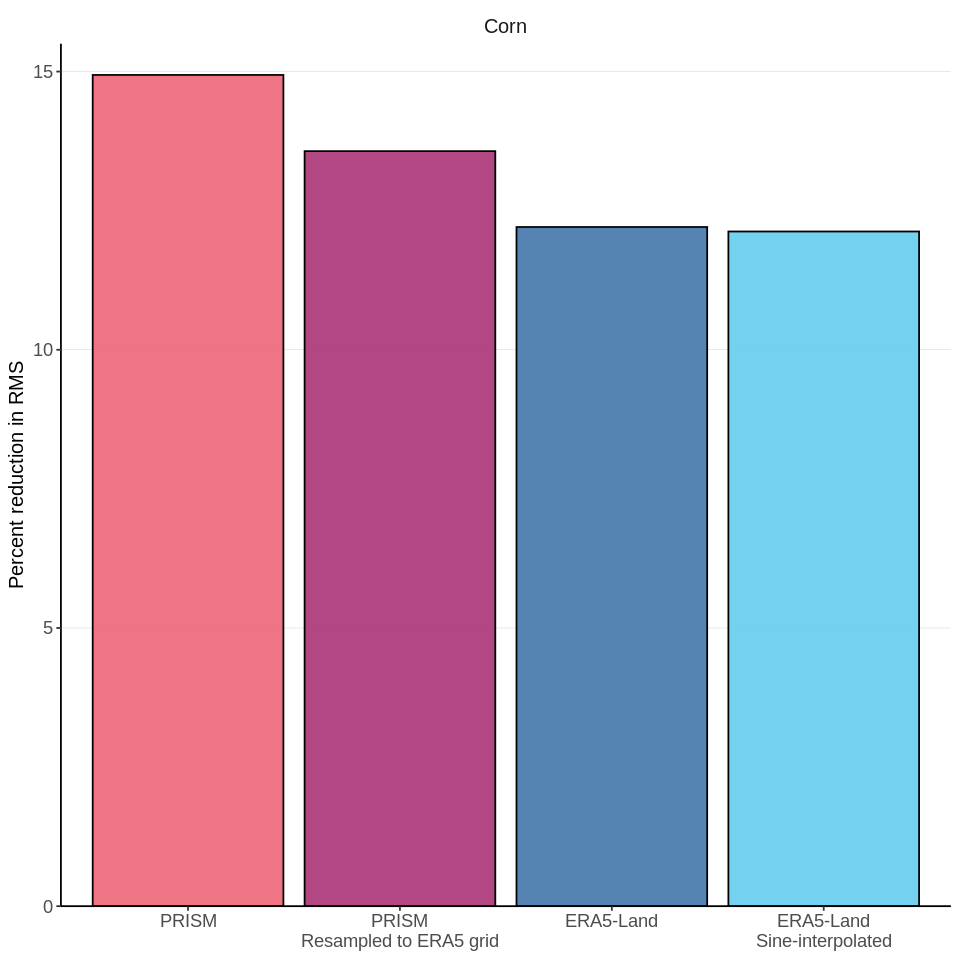

In [42]:
options(repr.plot.width=8, repr.plot.height=8)
plot = plot_rms(
        oos,
        transform=c('piecewise'),
        c('#EE6677', '#AA3377', '#4477AA', '#66CCEE')
    ) + 
    scale_y_continuous(expand=c(0,0), breaks=c(0,5,10,15), limits=c(0,15.5)) +
    theme(legend.position='none')
plot

In [44]:
# options(repr.plot.width=14, repr.plot.height=8)
ggsave(glue("{CODE}/results/figures/SI_out_of_sample_aggregation.pdf"), plot, width=7, height=7)